In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
num_epochs = 100
total_series_length = 200
truncated_backprop_length = 15
state_size = 4
num_classes = 2
echo_step = 3
batch_size = 5
num_batches = total_series_length//batch_size//truncated_backprop_length

In [3]:
def generateData():
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0

    x = x.reshape((batch_size, -1))  # The first index changing slowest, subseries as rows
    y = y.reshape((batch_size, -1))

    return (x, y)

In [4]:
batchX_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])

init_state = tf.placeholder(tf.float32, [batch_size, state_size])

In [5]:
W = tf.Variable(np.random.rand(state_size+1, state_size), dtype=tf.float32)
b = tf.Variable(np.zeros((1,state_size)), dtype=tf.float32)

W2 = tf.Variable(np.random.rand(state_size, num_classes),dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,num_classes)), dtype=tf.float32)

In [6]:
(inputs_series , labels_series) = generateData()
# Unpack columns
inputs_series = tf.unstack(batchX_placeholder, axis=1)
labels_series = tf.unstack(batchY_placeholder, axis=1)

In [7]:
# Forward pass
current_state = init_state
states_series = []
for current_input in inputs_series:
    current_input = tf.reshape(current_input, [batch_size, 1])
    input_and_state_concatenated = tf.concat([current_input, current_state],1)  # Increasing number of columns

    next_state = tf.tanh(tf.matmul(input_and_state_concatenated, W) + b)  # Broadcasted addition
    states_series.append(next_state)
    current_state = next_state

In [8]:
# Calculating loss
logits_series = [tf.matmul(state, W2) + b2 for state in states_series] #Broadcasted addition
predictions_series = [tf.nn.softmax(logits) for logits in logits_series]

losses = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits = logits, labels = labels) for logits, labels in zip(logits_series,labels_series)]
total_loss = tf.reduce_mean(losses)

train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)

In [9]:
# Visualizing the training
def plot(loss_list, predictions_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)

    for batch_series_idx in range(5):
        one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])

        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color="blue")
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color="red")
        plt.bar(left_offset, single_output_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


New data, epoch 0
Step 0 Loss 0.85771


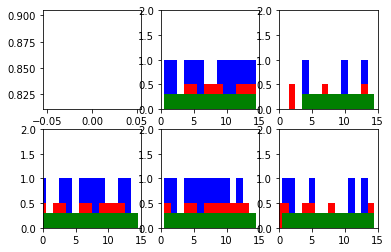

New data, epoch 1
Step 0 Loss 0.682605


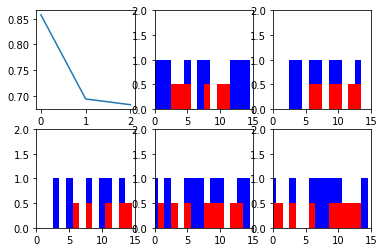

New data, epoch 2
Step 0 Loss 0.692413


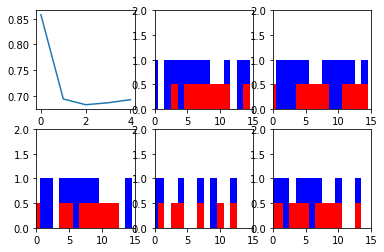

New data, epoch 3
Step 0 Loss 0.719721


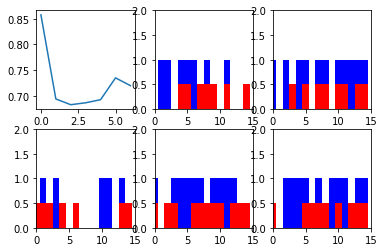

New data, epoch 4
Step 0 Loss 0.729854


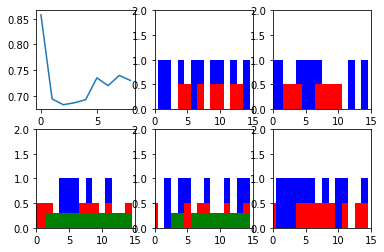

New data, epoch 5
Step 0 Loss 0.685478


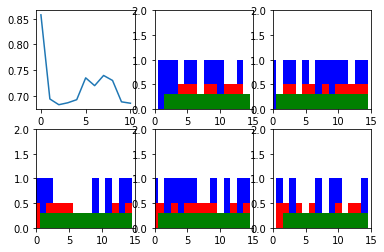

New data, epoch 6
Step 0 Loss 0.713127


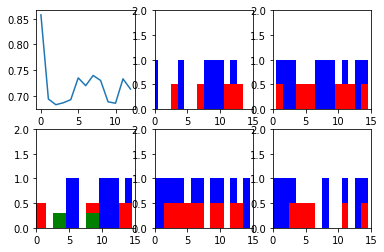

New data, epoch 7
Step 0 Loss 0.689355


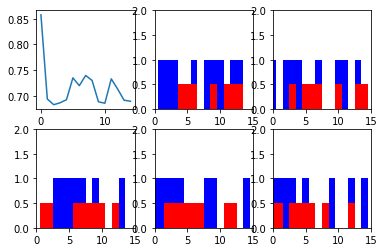

New data, epoch 8
Step 0 Loss 0.691079


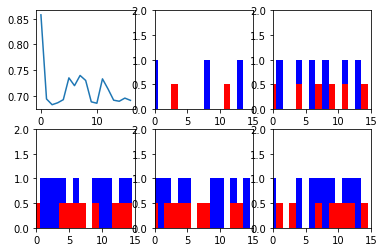

New data, epoch 9
Step 0 Loss 0.711041


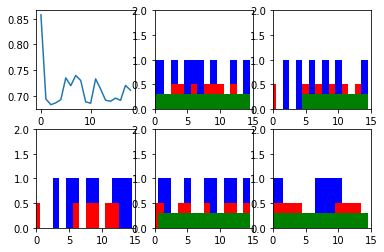

New data, epoch 10
Step 0 Loss 0.688881


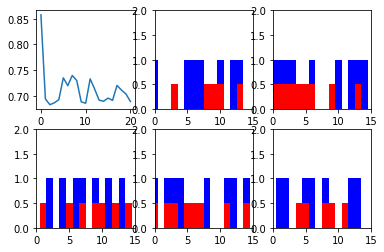

New data, epoch 11
Step 0 Loss 0.702126


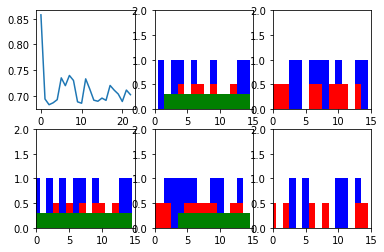

New data, epoch 12
Step 0 Loss 0.681324


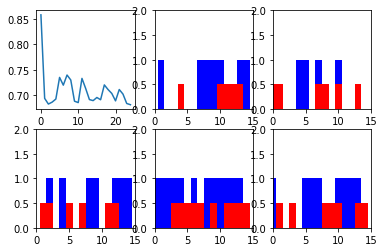

New data, epoch 13
Step 0 Loss 0.681976


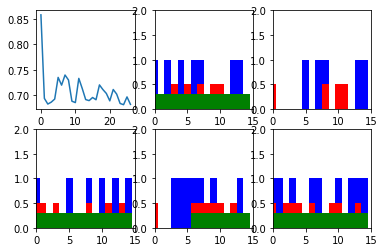

New data, epoch 14
Step 0 Loss 0.697101


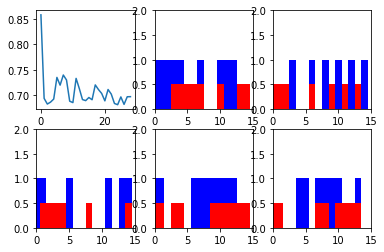

New data, epoch 15
Step 0 Loss 0.687366


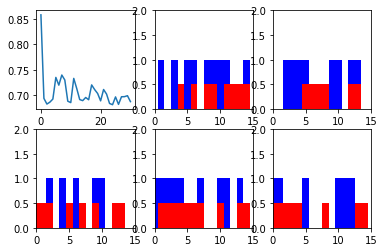

New data, epoch 16
Step 0 Loss 0.736845


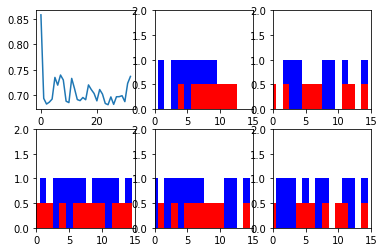

New data, epoch 17
Step 0 Loss 0.672859


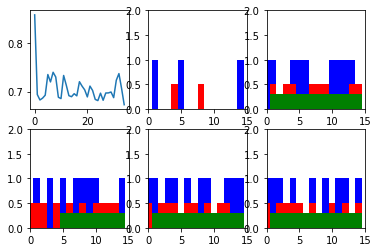

New data, epoch 18
Step 0 Loss 0.693777


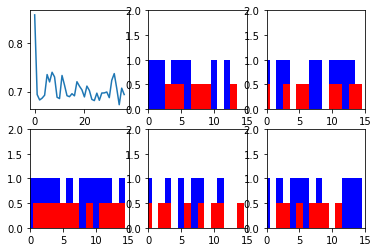

New data, epoch 19
Step 0 Loss 0.68314


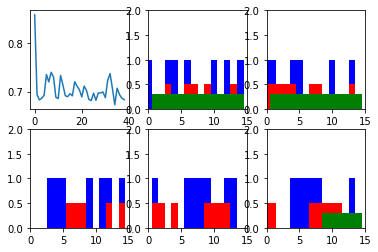

New data, epoch 20
Step 0 Loss 0.669499


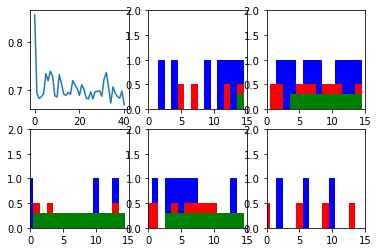

New data, epoch 21
Step 0 Loss 0.698143


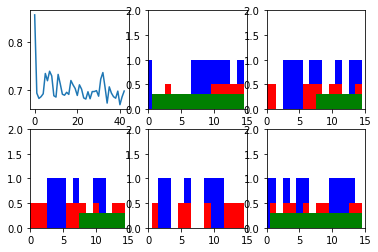

New data, epoch 22
Step 0 Loss 0.692209


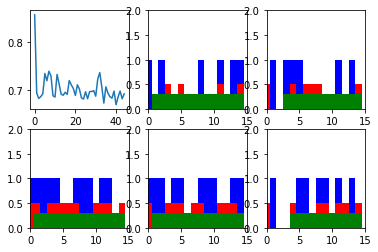

New data, epoch 23
Step 0 Loss 0.686963


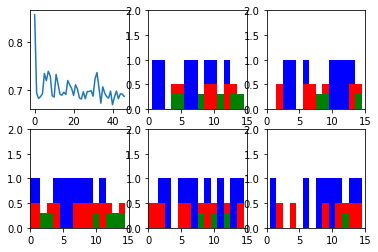

New data, epoch 24
Step 0 Loss 0.685186


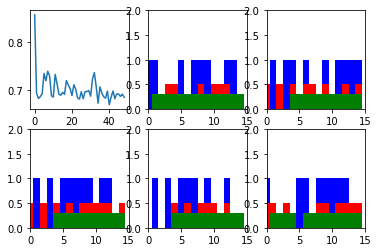

New data, epoch 25
Step 0 Loss 0.650097


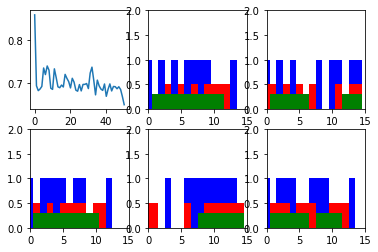

New data, epoch 26
Step 0 Loss 0.587627


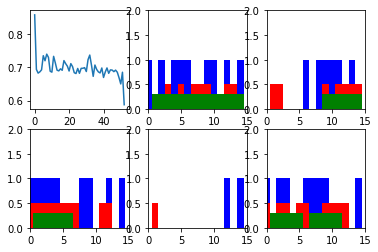

New data, epoch 27
Step 0 Loss 0.595077


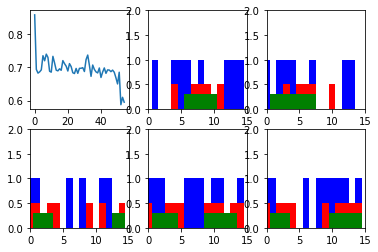

New data, epoch 28
Step 0 Loss 0.587631


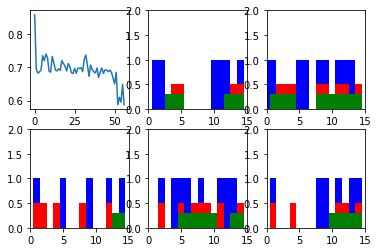

New data, epoch 29
Step 0 Loss 0.624048


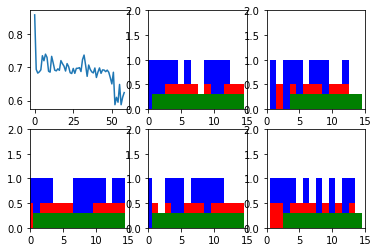

New data, epoch 30
Step 0 Loss 0.576313


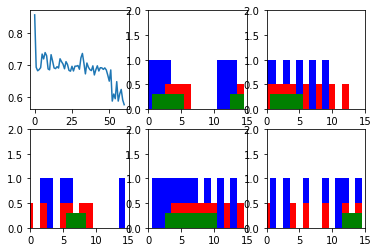

New data, epoch 31
Step 0 Loss 0.526198


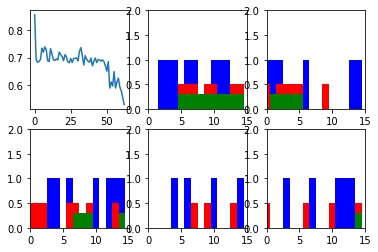

New data, epoch 32
Step 0 Loss 0.58356


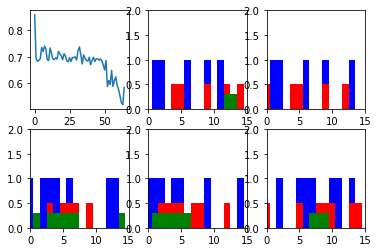

New data, epoch 33
Step 0 Loss 0.493544


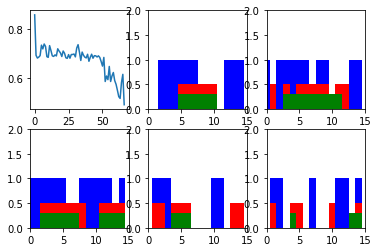

New data, epoch 34
Step 0 Loss 0.538574


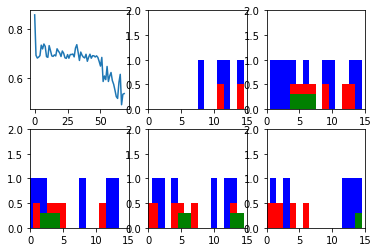

New data, epoch 35
Step 0 Loss 0.576731


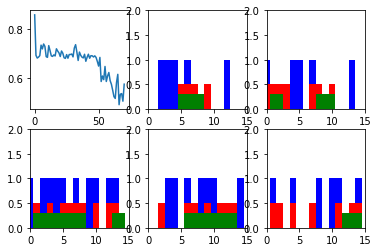

New data, epoch 36
Step 0 Loss 0.586571


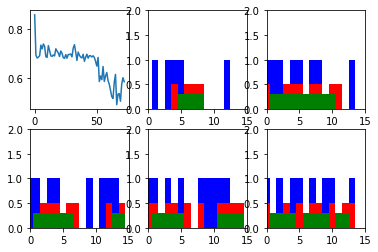

New data, epoch 37
Step 0 Loss 0.514644


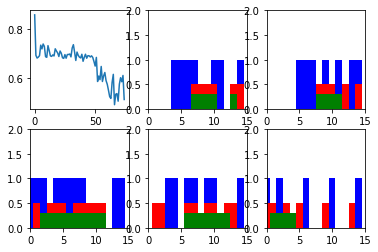

New data, epoch 38
Step 0 Loss 0.569801


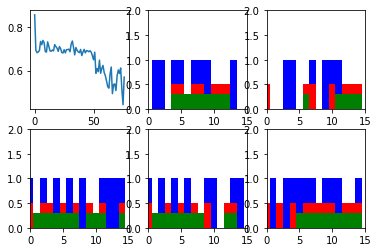

New data, epoch 39
Step 0 Loss 0.515621


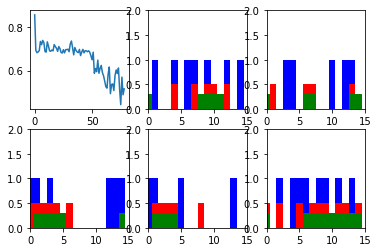

New data, epoch 40
Step 0 Loss 0.469742


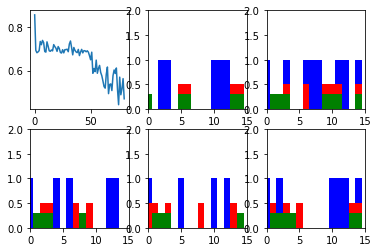

New data, epoch 41
Step 0 Loss 0.544579


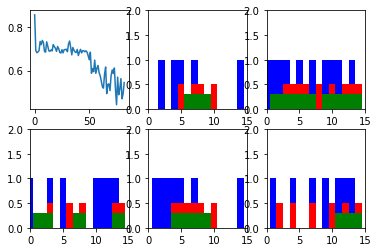

New data, epoch 42
Step 0 Loss 0.471789


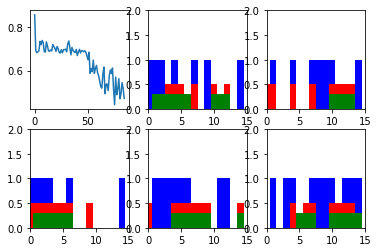

New data, epoch 43
Step 0 Loss 0.595849


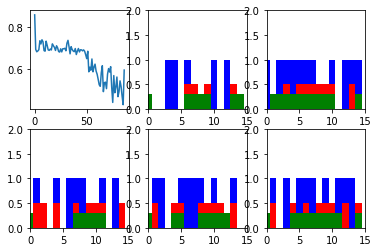

New data, epoch 44
Step 0 Loss 0.514378


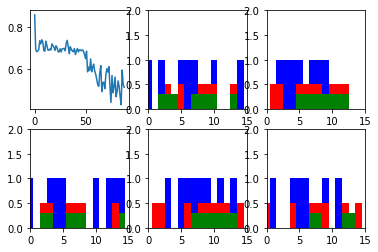

New data, epoch 45
Step 0 Loss 0.449437


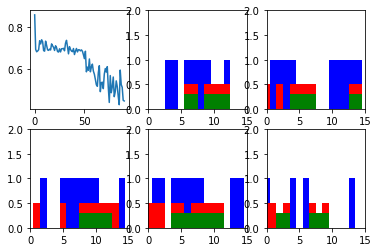

New data, epoch 46
Step 0 Loss 0.454839


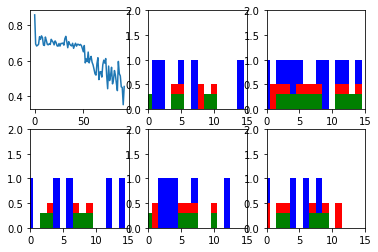

New data, epoch 47
Step 0 Loss 0.441071


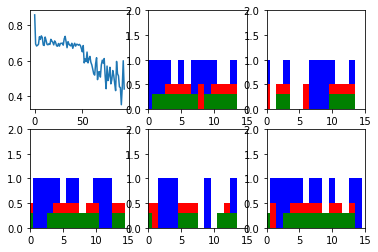

New data, epoch 48
Step 0 Loss 0.493195


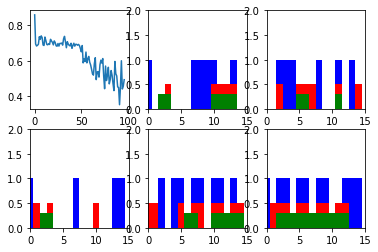

New data, epoch 49
Step 0 Loss 0.488405


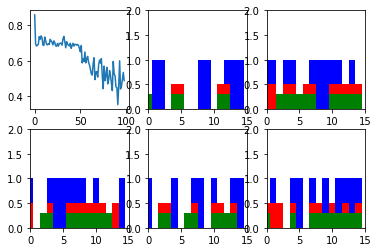

New data, epoch 50
Step 0 Loss 0.515588


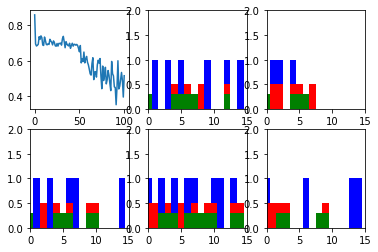

New data, epoch 51
Step 0 Loss 0.504723


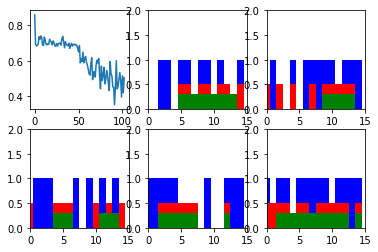

New data, epoch 52
Step 0 Loss 0.471836


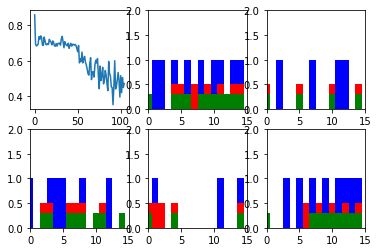

New data, epoch 53
Step 0 Loss 0.413089


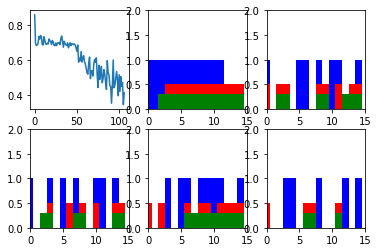

New data, epoch 54
Step 0 Loss 0.410959


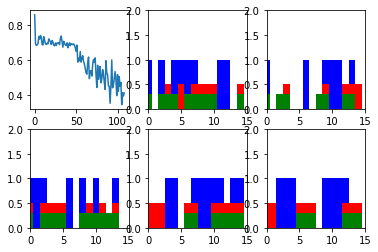

New data, epoch 55
Step 0 Loss 0.439518


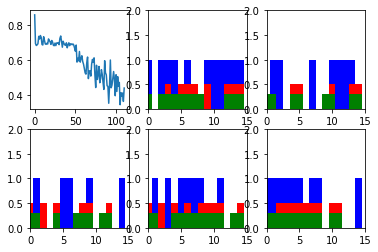

New data, epoch 56
Step 0 Loss 0.42038


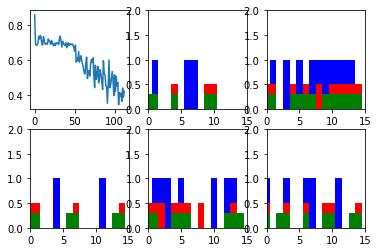

New data, epoch 57
Step 0 Loss 0.356558


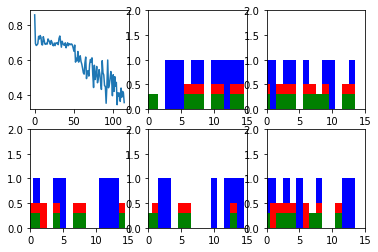

New data, epoch 58
Step 0 Loss 0.313781


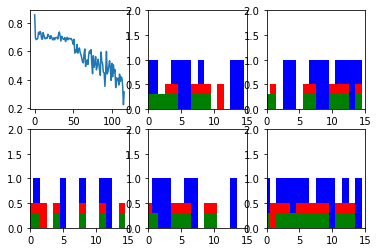

New data, epoch 59
Step 0 Loss 0.311239


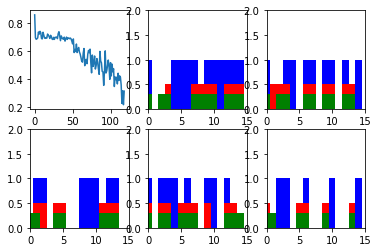

New data, epoch 60
Step 0 Loss 0.298081


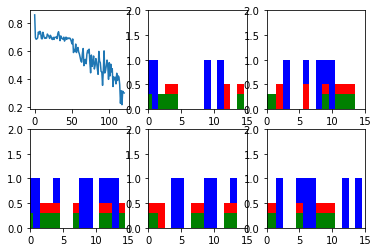

New data, epoch 61
Step 0 Loss 0.267107


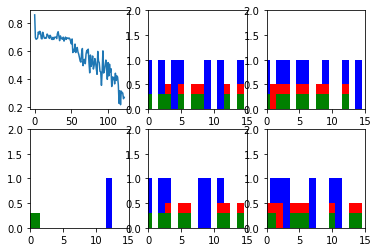

New data, epoch 62
Step 0 Loss 0.271088


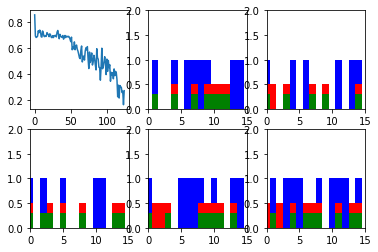

New data, epoch 63
Step 0 Loss 0.256744


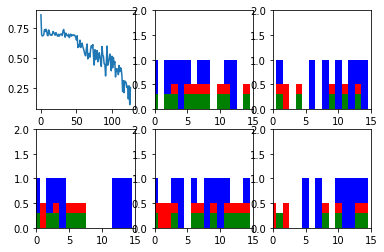

New data, epoch 64
Step 0 Loss 0.23264


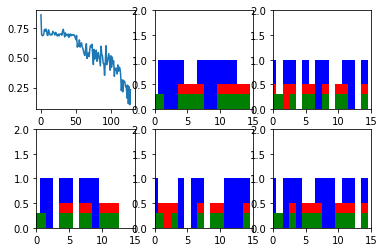

New data, epoch 65
Step 0 Loss 0.202664


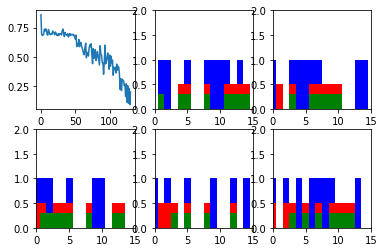

New data, epoch 66
Step 0 Loss 0.227598


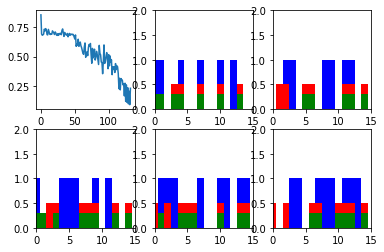

New data, epoch 67
Step 0 Loss 0.191181


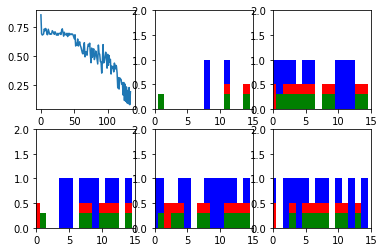

New data, epoch 68
Step 0 Loss 0.200731


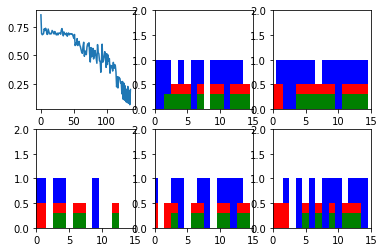

New data, epoch 69
Step 0 Loss 0.18114


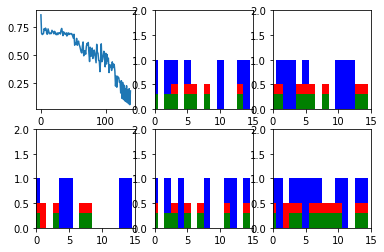

New data, epoch 70
Step 0 Loss 0.18989


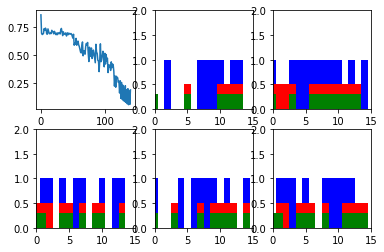

New data, epoch 71
Step 0 Loss 0.174939


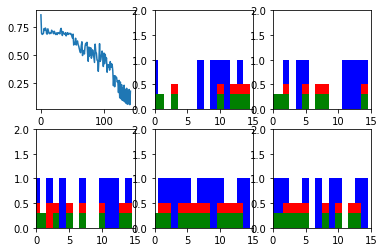

New data, epoch 72
Step 0 Loss 0.174925


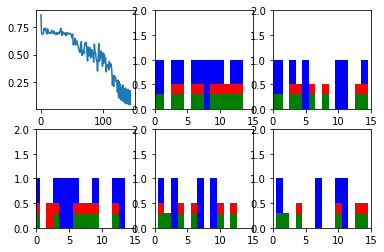

New data, epoch 73
Step 0 Loss 0.182455


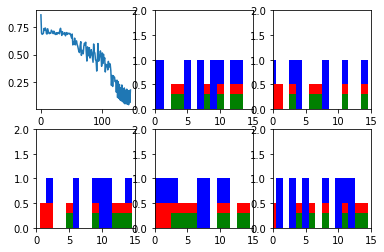

New data, epoch 74
Step 0 Loss 0.149968


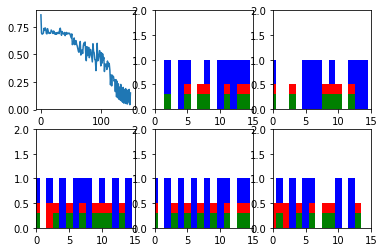

New data, epoch 75
Step 0 Loss 0.154531


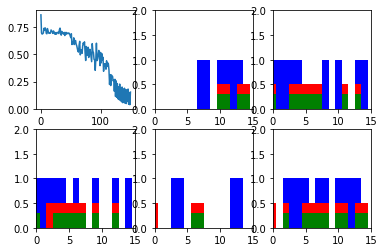

New data, epoch 76
Step 0 Loss 0.139966


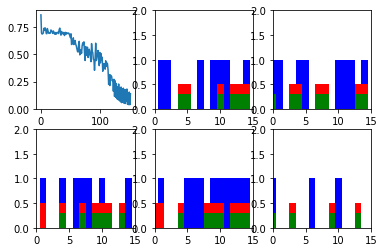

New data, epoch 77
Step 0 Loss 0.188867


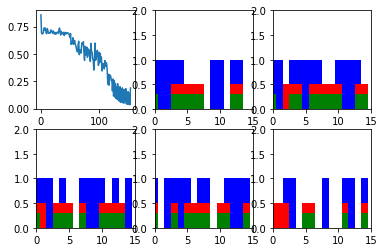

New data, epoch 78
Step 0 Loss 0.155275


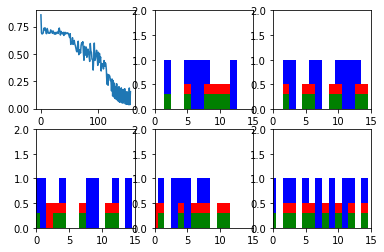

New data, epoch 79
Step 0 Loss 0.182372


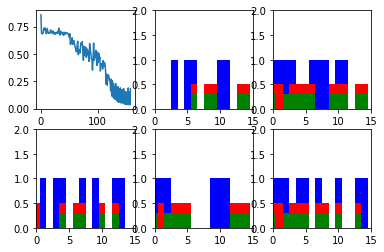

New data, epoch 80
Step 0 Loss 0.189403


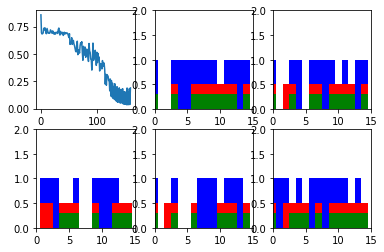

New data, epoch 81
Step 0 Loss 0.165285


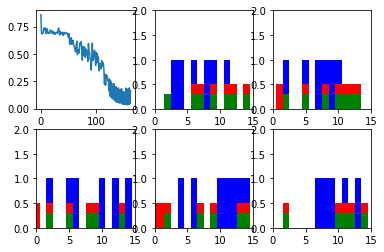

New data, epoch 82
Step 0 Loss 0.159818


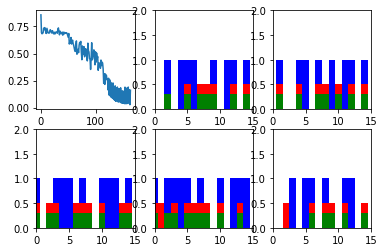

New data, epoch 83
Step 0 Loss 0.153449


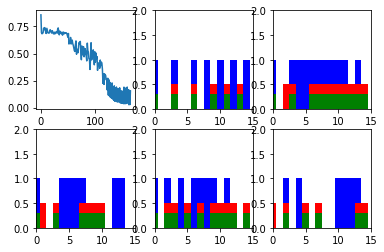

New data, epoch 84
Step 0 Loss 0.169614


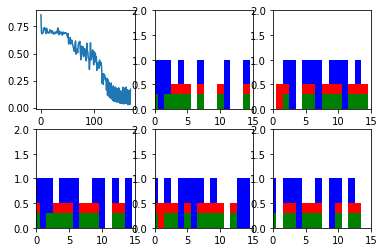

New data, epoch 85
Step 0 Loss 0.14913


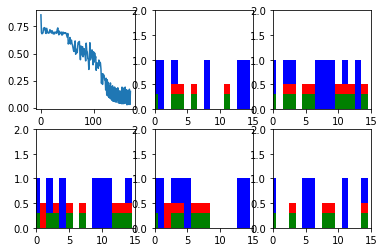

New data, epoch 86
Step 0 Loss 0.188137


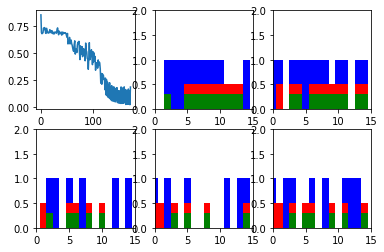

New data, epoch 87
Step 0 Loss 0.143893


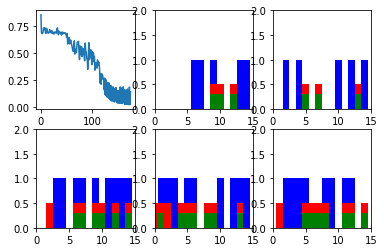

New data, epoch 88
Step 0 Loss 0.194337


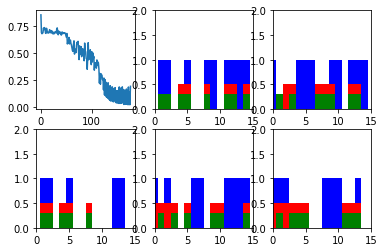

New data, epoch 89
Step 0 Loss 0.179826


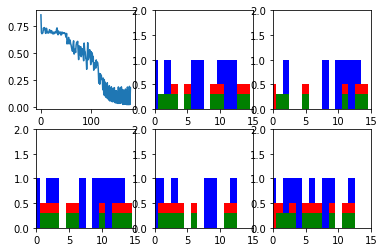

New data, epoch 90
Step 0 Loss 0.167601


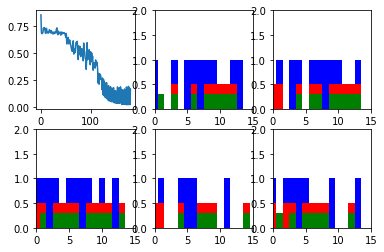

New data, epoch 91
Step 0 Loss 0.17557


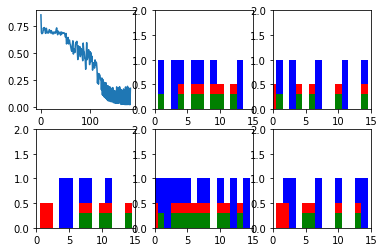

New data, epoch 92
Step 0 Loss 0.157962


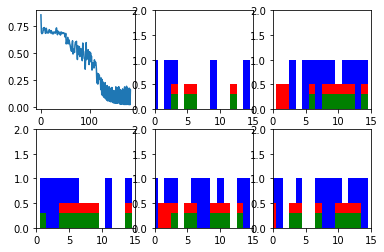

New data, epoch 93
Step 0 Loss 0.144505


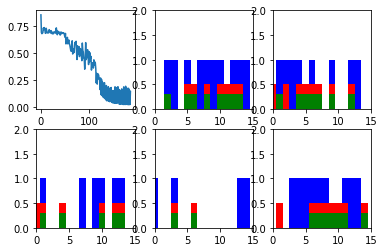

New data, epoch 94
Step 0 Loss 0.163361


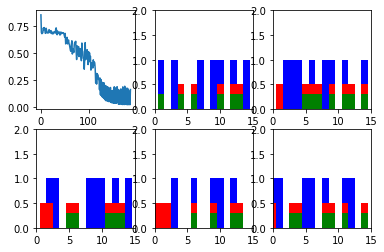

New data, epoch 95
Step 0 Loss 0.133558


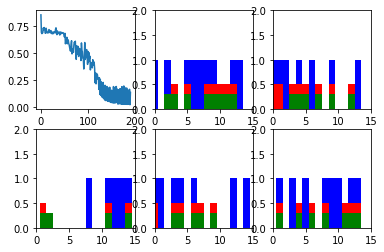

New data, epoch 96
Step 0 Loss 0.218452


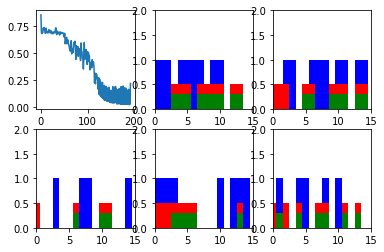

New data, epoch 97
Step 0 Loss 0.173655


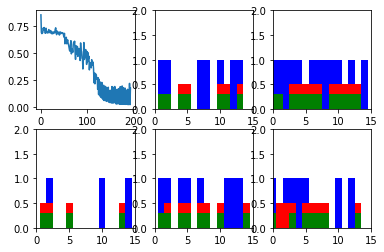

New data, epoch 98
Step 0 Loss 0.170361


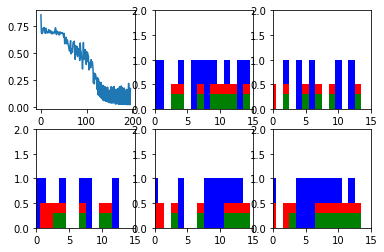

New data, epoch 99
Step 0 Loss 0.196154


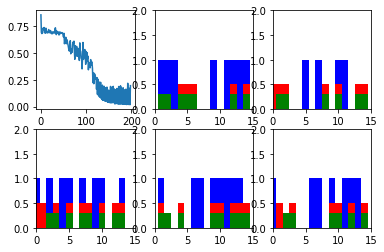

In [10]:
# Running a training session
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []

    for epoch_idx in range(num_epochs):
        x,y = generateData()
        _current_state = np.zeros((batch_size, state_size))

        print("New data, epoch", epoch_idx)

        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length

            batchX = x[:,start_idx:end_idx]
            batchY = y[:,start_idx:end_idx]

            _total_loss, _train_step, _current_state, _predictions_series = sess.run(
                [total_loss, train_step, current_state, predictions_series],
                feed_dict={
                    batchX_placeholder:batchX,
                    batchY_placeholder:batchY,
                    init_state:_current_state
                })

            loss_list.append(_total_loss)

            if batch_idx%100 == 0:
                print("Step",batch_idx, "Loss", _total_loss)
                plot(loss_list, _predictions_series, batchX, batchY)

plt.ioff()
plt.show()